#imports

In [341]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import seaborn as sb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost.core  import CatBoostRegressor
import lightgbm as lgb

dados = pd.read_csv('/content/drive/MyDrive/cursoudemyminiciante/housing.csv', sep=',', encoding='utf-8')


In [334]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


#tratamento

RM= NUMERO MEDIO DE COMODOS ENTRE IMOVEIS

LSTAT= PORCETAGEM DE PROPRIETARIOS NO BAIRRO DE CLASSE BAIXA


PTRATIO= RAZÃO ENTRE ESTUDANTES E PROFESSORES NAS ESCOLA DE ENSINO FUN  E MEDIO NO BAIRRO

In [3]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
dados['RM'].value_counts().sort_index()

RM
3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.247    1
8.259    1
8.266    1
8.337    1
8.398    1
Name: count, Length: 430, dtype: int64

In [ ]:
dados['LSTAT'].value_counts().sort_index()

LSTAT
1.98     1
2.47     1
2.87     1
2.94     1
2.98     1
        ..
34.37    1
34.41    1
34.77    1
36.98    1
37.97    1
Name: count, Length: 442, dtype: int64

In [ ]:
dados['PTRATIO'].value_counts().sort_index()

PTRATIO
12.6      3
13.0     10
14.7     29
14.8      3
14.9      4
15.1      1
15.2     13
15.3      3
15.5      1
15.6      2
15.9      2
16.0      5
16.1      5
16.4      6
16.6     16
16.8      4
16.9      5
17.0      4
17.3      1
17.4     17
17.6      7
17.8     22
17.9     11
18.0      5
18.2      4
18.3      4
18.4     16
18.5      4
18.6     17
18.7      9
18.8      2
18.9      3
19.0      4
19.1     17
19.2     19
19.6      8
19.7      8
20.1      5
20.2    134
20.9     11
21.0     27
21.1      1
21.2     15
22.0      2
Name: count, dtype: int64

In [ ]:
dados['MEDV'].value_counts().sort_index()

MEDV
105000.0     2
117600.0     1
132300.0     1
147000.0     2
151200.0     3
            ..
966000.0     1
980700.0     1
1014300.0    1
1018500.0    1
1024800.0    1
Name: count, Length: 228, dtype: int64

In [ ]:
dados.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [ ]:
dados.dtypes


RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [ ]:
dados.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


<Axes: xlabel='RM', ylabel='Count'>

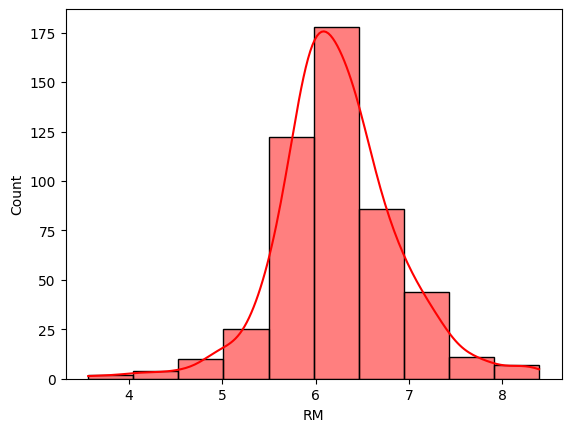

In [ ]:
sb.histplot (dados, x='RM', bins=10, color="red",  kde=True, stat="count")

<Axes: xlabel='LSTAT', ylabel='Count'>

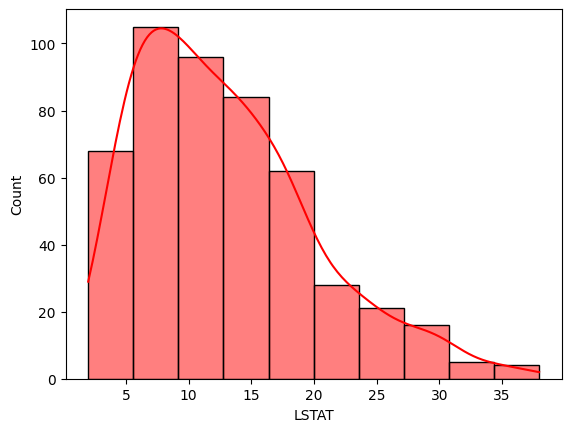

In [ ]:
sb.histplot (dados, x='LSTAT', bins=10, color="red",  kde=True, stat="count")

<Axes: xlabel='PTRATIO', ylabel='Count'>

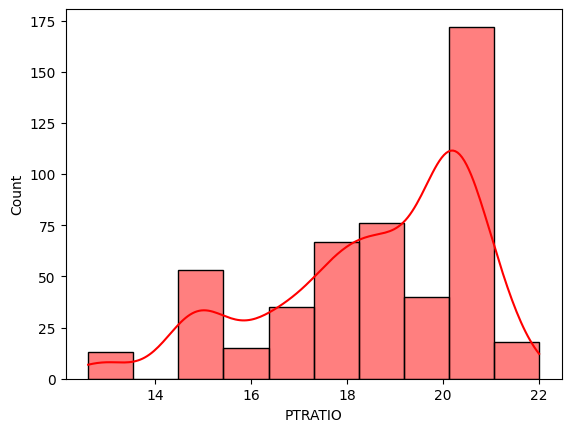

In [ ]:
sb.histplot (dados, x='PTRATIO', bins=10, color="red",  kde=True, stat="count")

<Axes: xlabel='MEDV', ylabel='Count'>

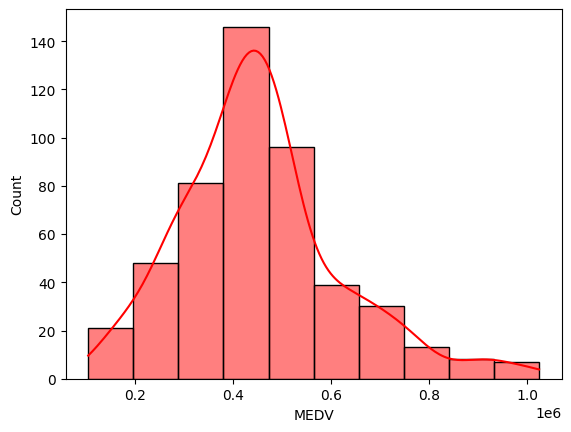

In [ ]:
sb.histplot (dados, x='MEDV', bins=10, color="red",  kde=True, stat="count")

In [ ]:
boxplot=px.box(dados, y='RM')
boxplot.show()

In [ ]:
boxplot2=px.box(dados, y='LSTAT')
boxplot2.show()

In [ ]:
boxplot3=px.box(dados, y='PTRATIO')
boxplot3.show()

In [ ]:
boxplot4=px.box(dados, y='MEDV')
boxplot4.show()

#corrrelação linear

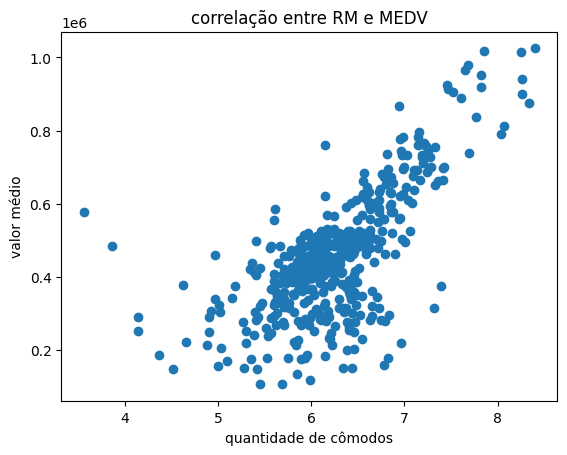

In [ ]:
plt.scatter(dados.RM, dados.MEDV)
plt.title('correlação entre RM e MEDV')
plt.xlabel('quantidade de cômodos')
plt.ylabel('valor médio')
plt.grid (False)


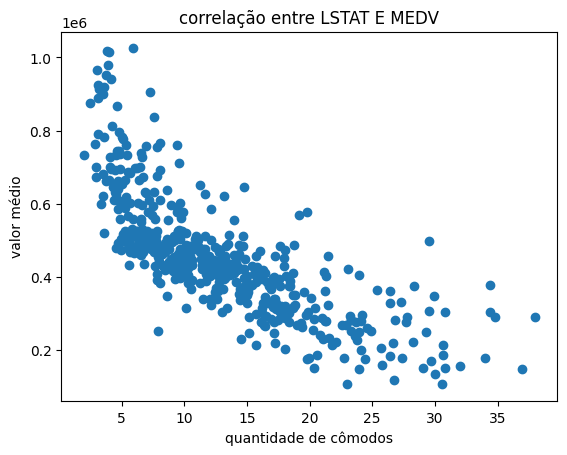

In [ ]:
plt.scatter(dados.LSTAT, dados.MEDV)
plt.title('correlação entre LSTAT E MEDV')
plt.xlabel('quantidade de cômodos')
plt.ylabel('valor médio')
plt.grid (False)


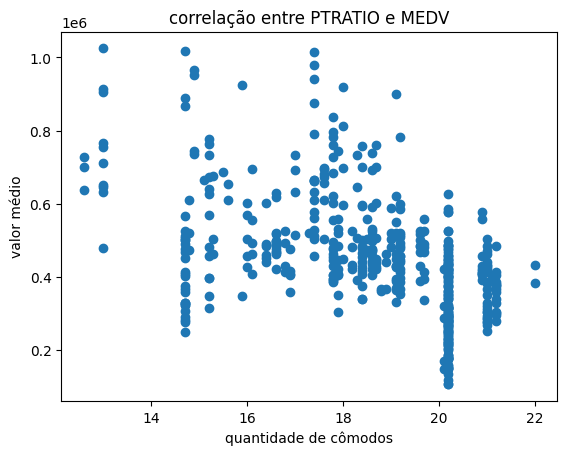

In [ ]:
plt.scatter(dados.PTRATIO, dados.MEDV)
plt.title('correlação entre PTRATIO e MEDV')
plt.xlabel('quantidade de cômodos')
plt.ylabel('valor médio')
plt.grid (False)


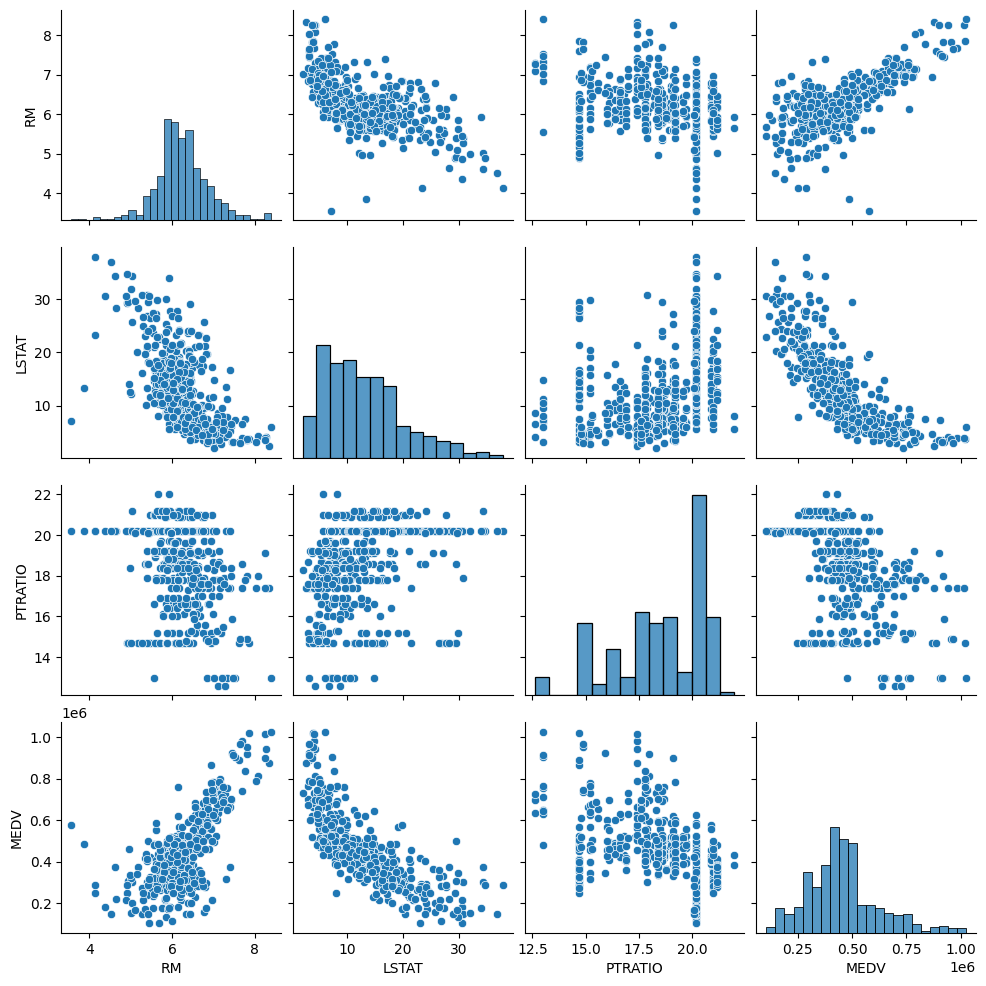

In [ ]:
sb.pairplot (dados);

##analises de normalidade


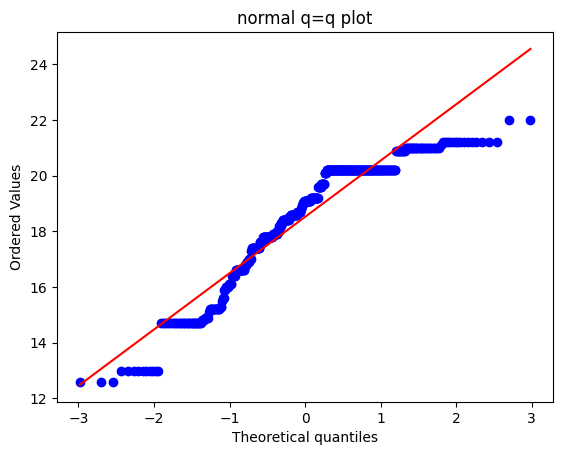

In [ ]:
sts.probplot(dados['PTRATIO'], dist='norm', plot=plt)
plt.title ("normal q=q plot")
plt.show()

In [ ]:
hist= px.histogram(dados, x='PTRATIO', color_discrete_sequence=['green'])
hist.update_layout(width=800, height=500, title_text = 'media dos valores')

hist.show()

os pontos em azul que são os dados; a reta vermelho é a linha de normalidade;
se não está alinhado e estiver como está aqui é uma distribuição anormal'

## TESTE DE SHAPIRO

HO= DISTRIBUIÇÃO NORMAL :P>0,05

HA= DISTRIBUIÇÃO != NORMAL: P <= 0,05

In [ ]:
sts.shapiro (dados.MEDV)

ShapiroResult(statistic=0.9596619009971619, pvalue=2.5762864064304836e-10)

In [ ]:
estatistica, p = sts.shapiro (dados.MEDV)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

estatistica= 0.9596619009971619
p= 2.5762864064304836e-10


In [ ]:
estatistica, p = sts.shapiro (dados.RM)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

estatistica= 0.9708166718482971
p= 2.7085933496096004e-08


In [ ]:
estatistica, p = sts.shapiro (dados.PTRATIO)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

estatistica= 0.9064800143241882
p= 9.07583957756611e-17


In [ ]:
estatistica, p = sts.shapiro (dados.LSTAT)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

estatistica= 0.9371760487556458
p= 1.6900520425407878e-13


para utilizar com dados acima de 5k nusamos o statsmodels.state.diagnostic from lilliefors

###correlacionando

pearson (d normal)

spearman (dados n normal)== nossos dados

kendall (dados n normal com quantidade pqn de amostra (menor que 30))

In [ ]:
coef, p = sts.spearmanr (dados.RM, dados.MEDV)
print('coef= {} \n\n p={}'.format (coef,p))

coef= 0.6240572939087419 

 p=3.845028634343161e-54


In [ ]:
coo = dados.corr (method='spearman')
coo

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


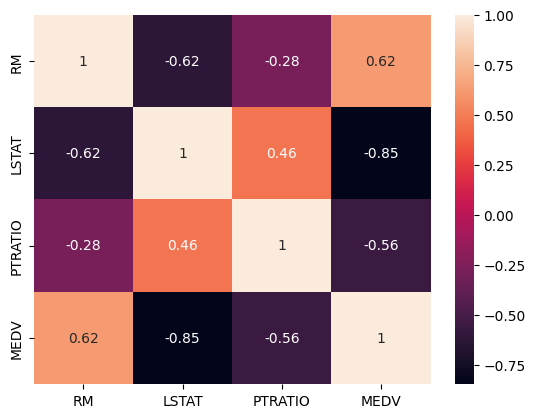

In [ ]:
plt.figure
sb.heatmap(coo, annot=True);

coorelção linear serve para verificar a correlação entre as grandezas e aplicar no estudo da regressão...

#regressão linear simples


1 valor médio de comodos

In [ ]:
mc=dados.iloc[:, 0:1].values
mc

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [ ]:
alv=dados.iloc[:, 3].values
alv

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

#começando os treinos

In [ ]:
xtreino, xteste, ytreino, yteste = train_test_split(mc, alv, test_size=0.3, random_state=10)

In [ ]:
xtreino.shape, ytreino.shape

((342, 1), (342,))

In [ ]:
xteste.shape, yteste.shape

((147, 1), (147,))

In [ ]:

regl1 = LinearRegression()
regl1.fit(xtreino, ytreino)
LinearRegression()

LinearRegression()

In [ ]:


regl1.coef_

array([173771.45170999])

In [ ]:
regl1.intercept_


-626510.2699464143

equação
valor=intercept - coef . numero de comodos

In [ ]:
regl1.score(xtreino, ytreino)

0.46368351515551953

In [ ]:
regl1.score(xteste, yteste)

0.5426573915930195

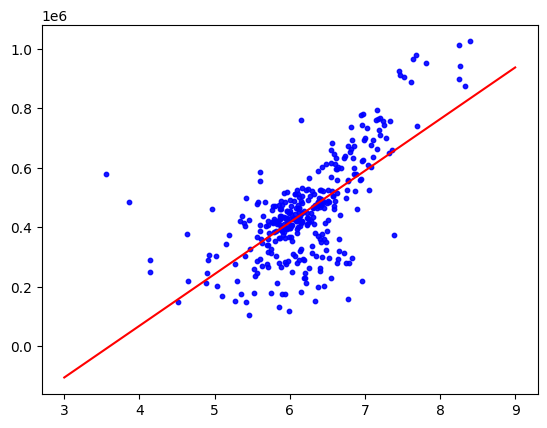

In [ ]:
plt.scatter(x=xtreino, y=ytreino, color='blue', s=10,alpha=0.9)
x_plot = np.linspace(3, 9)
plt.plot (x_plot, x_plot*regl1.coef_+regl1.intercept_, color='r')

In [ ]:
previsoesteste= regl1.predict(xteste)
previsoesteste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

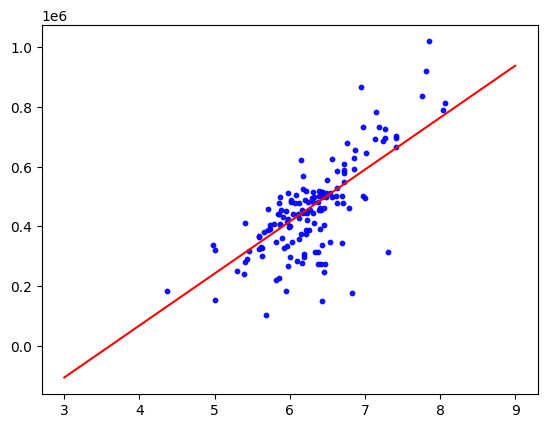

In [ ]:
plt.scatter(x=xteste, y=yteste, color='blue', s=10,alpha=0.9)
x_plot = np.linspace(3, 9)
plt.plot (x_plot, x_plot*regl1.coef_+regl1.intercept_, color='r')

In [ ]:
valor_casa=regl1.predict([[4]])
valor_casa

array([68575.53689355])

metricas de desempenho

In [ ]:
abs(yteste- previsoesteste).mean()

76063.99733079868

In [ ]:
mean_absolute_error (yteste, previsoesteste)
#error medio absoluto

76063.99733079868

In [ ]:
mean_squared_error (yteste, previsoesteste)
#error quadatico medio

11294624525.740473

In [ ]:
np.sqrt(mean_squared_error (yteste, previsoesteste))
#raiz do error quadratico medio

106276.17101561607

raiz qdd do quadratico medio = 106276.17101561607

In [ ]:
x2 = dados.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
xtreino2, xteste2, ytreino2, yteste2 = train_test_split(x2, alv, test_size=0.3, random_state=10)

In [ ]:
xtreino2.shape, ytreino2.shape

((342, 1), (342,))

In [ ]:
regl2= LinearRegression()
regl2.fit(xtreino2, ytreino2)

LinearRegression()

In [ ]:
regl2.intercept_

681977.7451055486

In [ ]:
regl2.coef_

array([-17263.75010515])

In [ ]:
regl2.score(xtreino2, ytreino2)

0.5688289563355992

In [ ]:
regl2.score(xteste2, yteste2)

0.6006038196307664

In [ ]:
previsoesteste2= regl2.predict(xteste2)
previsoesteste2

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

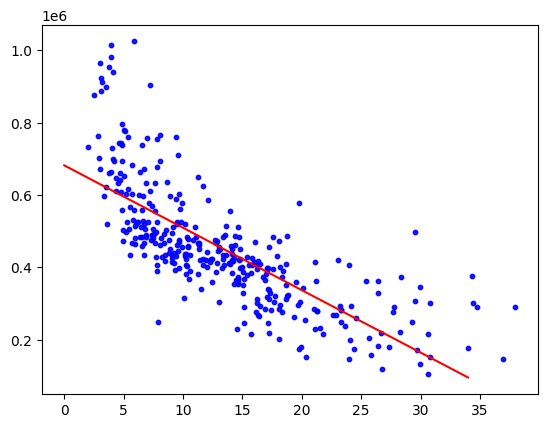

In [ ]:
plt.scatter(x=xtreino2, y=ytreino2, color='blue', s=10,alpha=0.9)
x2_plot = np.linspace(0, 34)
plt.plot (x2_plot, x2_plot*regl2.coef_+regl2.intercept_, color='r')

In [ ]:
valor_casa=regl2.predict([[39]])
valor_casa

array([8691.49100478])

In [ ]:
abs(yteste2- previsoesteste2).mean()

76340.55192245146

In [ ]:
mean_squared_error (yteste2, previsoesteste2)

9863567949.634668

In [ ]:
np.sqrt(mean_squared_error (yteste2, previsoesteste2))

99315.49702657017

In [ ]:
x3 = dados.iloc[:, 2:3].values
x3

array([[15.3],
       [17.8],
       [17.8],
       [18.7],
       [18.7],
       [18.7],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [19.2],
       [19.2],
       [19.2],
       [19.2],
       [18.3],
       [18.3],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [16.8],
       [16.8],
       [16.8],
       [16.8],
       [21.1],
       [17.9],
       [17.3],
       [15.1],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [18.6],
       [16.1],
       [16

In [ ]:
xtreino3, xteste3, ytreino3, yteste3 = train_test_split(x3, alv, test_size=0.3, random_state=10)

In [ ]:
xtreino3.shape, ytreino3.shape

((342, 1), (342,))

In [ ]:
xteste3.shape, yteste3.shape

((147, 1), (147,))

In [ ]:
regl3= LinearRegression()
regl3.fit(xtreino3, ytreino3)

LinearRegression()

In [ ]:
regl3.intercept_


1249904.1850767543

In [ ]:
regl3.coef_

array([-42872.50441416])

In [ ]:
previsoes3= regl3.predict(xteste3)
previsoes3

array([538220.61180169, 353868.84282081, 452475.60297337, 546795.11268453,
       409603.09855921, 593954.8675401 , 461050.10385621, 383879.59591072,
       431039.35076629, 383879.59591072, 538220.61180169, 482486.35606329,
       349581.59237939, 619678.3701886 , 388166.84635213, 486773.6065047 ,
       383879.59591072, 486773.6065047 , 341007.09149656, 383879.59591072,
       692561.62769267, 619678.3701886 , 503922.60827037, 486773.6065047 ,
       482486.35606329, 349581.59237939, 538220.61180169, 486773.6065047 ,
       478199.10562187, 383879.59591072, 383879.59591072, 461050.10385621,
       538220.61180169, 619678.3701886 , 503922.60827037, 383879.59591072,
       619678.3701886 , 349581.59237939, 619678.3701886 , 495348.10738753,
       383879.59591072, 409603.09855921, 709710.62945834, 598242.11798152,
       486773.6065047 , 585380.36665727, 383879.59591072, 341007.09149656,
       619678.3701886 , 559656.86400877, 598242.11798152, 383879.59591072,
       383879.59591072, 6

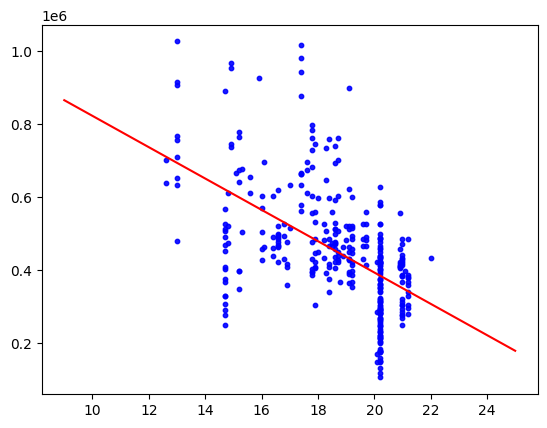

In [ ]:
plt.scatter(x=xtreino3, y=ytreino3, color='blue', s=10,alpha=0.9)
x3_plot= np.linspace(9, 25)
plt.plot (x3_plot, x3_plot*regl3.coef_+regl3.intercept_, color='r');

In [ ]:
valor_casa=regl3.predict([[29]])
valor_casa

array([6601.55706611])

In [ ]:
regl3.score(xtreino3, ytreino3)

0.2981454757369286

In [ ]:
regl3.score(xteste3, yteste3)

0.18894714160445847

In [ ]:
abs(yteste3- previsoes3).mean()

108296.76904163913

In [ ]:
mean_squared_error (yteste3, previsoes3)

20029923601.507973

In [ ]:
np.sqrt(mean_squared_error (yteste3, previsoes3))

141527.11260217236

In [ ]:
kfold = KFold(n_splits=15,shuffle=True, random_state=10)

metodo= LinearRegression()
resultado= cross_val_score(metodo, x3, alv, cv=kfold)
resultado

array([-0.04800217,  0.29488571, -0.00856847,  0.30108167,  0.00842837,
        0.2744689 ,  0.24492355,  0.41729012,  0.4476036 ,  0.47688496,
        0.20085235,  0.18833692,  0.11074539,  0.36119692,  0.00238525])

# avaliando a regressão linear simples

In [ ]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
x2 = dados.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
y=dados.iloc[:,3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
regresao=smf.ols('y~x2', data=dados).fit()
regresao

In [ ]:
residuos=regresao.resid
residuos

0      -91698.432398
1      -68220.791356
2      116130.471691
3       69473.109014
4      170717.234516
           ...      
484    -42008.495743
485    -90286.334256
486    -82077.460502
487   -107059.859907
488   -294297.192249
Length: 489, dtype: float64

In [ ]:
estatistica, p = sts.shapiro (residuos)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

estatistica= 0.9171054363250732
p= 9.782326333115975e-16


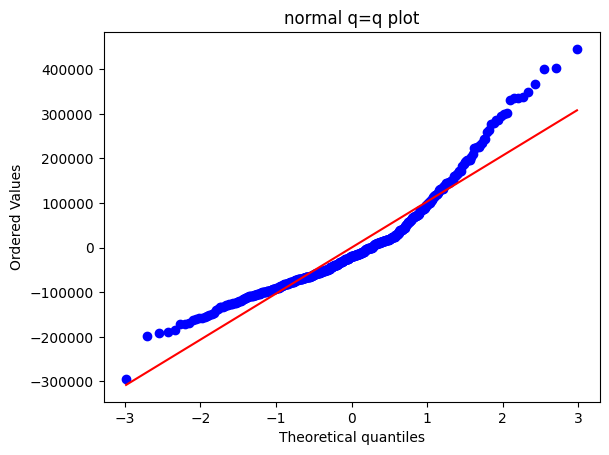

In [ ]:
sts.probplot(residuos, dist='norm', plot=plt)
plt.title ("normal q=q plot")
plt.show()

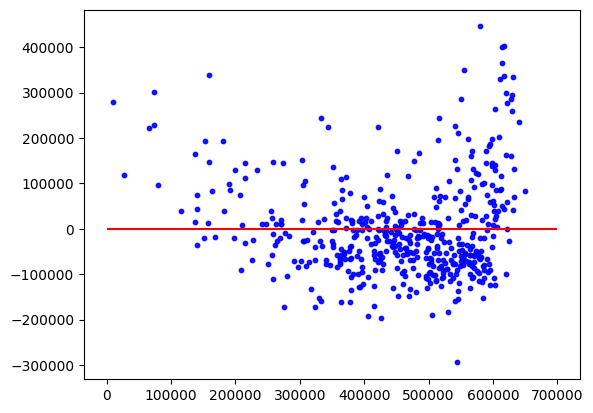

In [ ]:
plt.scatter(x=regresao.predict(), y=residuos, color='blue', s=10,alpha=0.9)
plt.hlines (y=0, xmin=0, xmax=700000, color='r')


## teste de breush-pagan
 (homocedasticidade ou heterocedasticidade)

In [ ]:
estatistica,p ,f, fp = sms.het_breuschpagan (regresao.resid, regresao.model.exog)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))
print('f= {}'.format (f))
print('fp= {}'.format (fp))

estatistica= 5.3825533640267285
p= 0.020339089399132346
f= 5.420200421872106
fp= 0.020313692181464678


In [ ]:
coefs=pd.DataFrame(regresao.params)
coefs.columns=['coeficientes']
print (coefs)

            coeficientes
Intercept  684138.493068
x2         -17759.048327


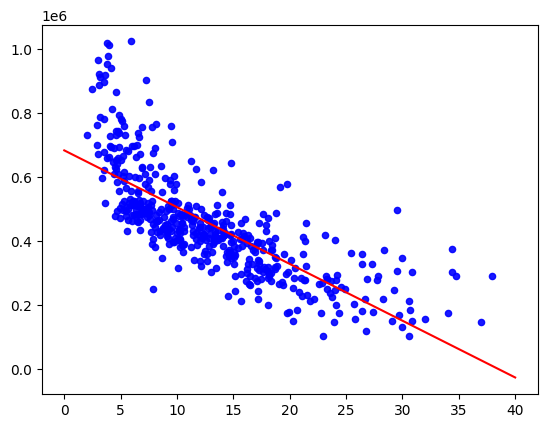

In [ ]:
plt.scatter (y=dados.MEDV, x= dados.LSTAT, color='blue', s=20,alpha=0.9)
xplot = np.linspace (0, 40)
plt.plot (xplot, xplot*regresao.params[1]+regresao.params[0], color='r')

# regressão linear multipla


In [ ]:
dados.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
independetes=dados.iloc[:, 0:3].values
independetes

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independetes.shape

(489, 3)

In [ ]:
depedente=dados.iloc[:,3].values
depedente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
x_treino5, x_teste5, y_treino, y_teste = train_test_split (independetes,depedente, test_size=0.3, random_state=0)

In [ ]:
x_treino5.shape, x_teste5.shape

((342, 3), (147, 3))

In [ ]:
multipla= LinearRegression()
multipla.fit(x_treino5, y_treino)

LinearRegression()

In [ ]:
multipla.intercept_

434789.4550955225

In [ ]:
multipla.coef_

array([ 85325.36412937, -10775.41479323, -20133.58779106])

In [ ]:
print =("equação = ({:.2f})+ ({:.2f})*RM + ({:.2f})*LSTAT+({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

In [ ]:
multipla.score(x_treino5, y_treino)

0.7343049403294957

##testes


In [ ]:
previsoes=multipla.predict(x_teste5)
previsoes

array([418504.52251533, 682498.59311161, 310842.03220354, 399602.67212048,
       529013.04970446, 364349.16756502, 241564.07559959, 413075.10184459,
       476051.89023052, 371925.92192458, 324382.18849665, 357068.87403347,
       472650.96518839,  52625.76046357, 486476.7874084 , 312653.08514703,
       465067.60969605, 614663.51972717, 383059.21254559, 653229.85415898,
       677008.34036381, 653364.33988067,  15201.46316315, 452877.56192735,
       360692.75896586, 754677.40725013, 714803.22773315, 754640.19558449,
       430756.93101727, 422579.57707332, 378309.3992427 , 461958.22362764,
       472103.18520444, 681780.56381622, 457070.41410848, 769207.31373834,
       520822.33816699, 261675.315203  , 503180.52774604, 590132.54786611,
       324624.03541901, 452521.53520288, 400704.94316867, 498314.39406844,
       280336.01343561, 365481.99718596, 525798.46427921, 361547.63013434,
       716795.14226269, 407424.79029782, 679886.98036124, 445827.68346551,
       614892.98134094, 3

In [ ]:
multipla.score(x_teste5, y_teste)

0.6817814124380092

#avaliando a regressão multipla

In [ ]:
modelo=smf.ols ('MEDV ~ RM + LSTAT + PTRATIO', data=dados).fit()
modelo;

In [ ]:
residuos=modelo.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

##teste de normalidade

In [ ]:
estatistica, p = sts.shapiro (residuos)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))

TypeError: 'str' object is not callable

In [ ]:
sts.probplot(residuos, dist='norm', plot=plt)
plt.title ("normal q=q plot")
plt.show()

homocedasticidade dos residuos

In [ ]:
plt.scatter (y=residuos, x=modelo.predict(), color='blue', s=20,alpha=0.9)
plt.hlines (y=0, xmin=0, xmax=700000, color='r')

homocedasticidade ou heterocedasticidade



In [ ]:
estastistica,p ,f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('estatistica= {}'.format (estatistica))
print('p= {}'.format (p))
print('f= {}'.format (f))
print('fp= {}'.format (fp))

verificando outliers



In [ ]:
outliers = modelo.outlier_test()


In [ ]:
outliers.max()

In [ ]:
outliers.min()

ausencia de multicolinearidade

somente entre variaveis independentes
considerada multicolinear quando r>0.9

In [ ]:
variaveis = dados [['RM', 'LSTAT', 'PTRATIO']]

In [ ]:
variaveis.head()

In [ ]:
correlacoes=variaveis.corr(method='pearson')
correlacoes

##analisando modelos


intercept

p_valor para cada coeficiente <0.05 (estatiticamente significativo)


adjested r-quadrado(explicação do modelo atraves dos dados)



p_valor da estastitica f <0.05 (valida modelo de regressão)

In [ ]:
print (modelo.summary())

equação:

                          coef

valor da casa= 4.155e+05(intercept) +  8.657e+04 (RM) -1.085e+04(LSTAT) -1.949e+04 (PTRATIO)

In [ ]:
#criando colunas com previsoes

dados['previsao'] = modelo.fittedvalues


In [ ]:
sb.lmplot (x='previsao', y='MEDV', data=dados)

# regressão polinomial

temos pontos max, e min da função. o ponto critico é a derivação dos y e x
dy/dx=0 é como calculamos de ponto critico

In [ ]:
x1 = dados.iloc[:,0:1].values
x1

In [ ]:
y=dados.iloc[:,3].values

In [ ]:
x_treinorp, x_teste, y_treino, y_teste = train_test_split (x1,y, test_size=0.3, random_state=0)

In [ ]:
x_treinorp.shape, x_teste.shape

In [ ]:
y_treino.shape, y_teste.shape

In [ ]:
gp=PolynomialFeatures(degree=2)


In [ ]:
x_poly=gp.fit_transform(x_treinorp)
x_poly

In [ ]:
polinomial=LinearRegression()
polinomial.fit(x_poly, y_treino)

In [ ]:
previsoes_treino= polinomial.predict(x_poly)
previsoes_treino

In [ ]:
polinomial.coef_

In [ ]:
polinomial.intercept_

In [ ]:
numeros=np.linspace(3, 8.88, 342)
numeros

In [ ]:
valor= 1640107.0085836346 -568528.11104731*numeros + 60092.59048475*numeros**2

In [ ]:
plt.scatter(x=x_treinorp, y=y_treino, color='gold')
plt.plot( numeros, valor, color='r');

#regressão svr

# Nova seção

In [ ]:
dados.head()

In [ ]:
independentes=dados.iloc[:, 0:3].values
independentes

In [ ]:
independentes.shape


In [ ]:
dependentes=dados.iloc[:,3].values
dependentes

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split (independentes,dependentes, test_size=0.3, random_state=0)

In [ ]:
svr=SVR(kernel='rbf')
svr.fit(x_treino, y_treino)

In [ ]:
svr.score(x_treino, y_treino)

In [ ]:
svr.score(x_teste, y_teste)

In [ ]:
xscaler=StandardScaler()
x_treino_scaler=xscaler.fit_transform(x_treino)
x_teste_scaler=xscaler.transform(x_teste)

In [ ]:
x_treino_scaler

In [ ]:
yscaler=StandardScaler()
y_treino_scaler = yscaler.fit_transform(y_treino.reshape(-1,1))

y_teste_scaler = yscaler.fit_transform(y_teste.reshape(-1,1))

In [ ]:
svr2=svr=SVR(kernel='rbf')
svr2.fit(x_treino_scaler, y_treino_scaler.ravel())

In [ ]:
svr2.score(x_treino_scaler, y_treino_scaler)

In [ ]:
svr2.score(x_teste_scaler, y_teste_scaler)

In [ ]:
previsoes_teste=svr2.predict(x_teste_scaler)
previsoes_teste

In [ ]:
y_teste_scaler

In [ ]:
y_teste_inverse=yscaler.inverse_transform(y_teste_scaler)
y_teste_inverse

In [ ]:
y_teste_inverse=yscaler.inverse_transform(y_teste_inverse)
previsoes_inverse=yscaler.inverse_transform(previsoes_teste.reshape ( -1, 1))


In [ ]:
mean_absolute_error (y_teste_inverse, previsoes_inverse)

In [ ]:
mean_squared_error (y_teste_inverse, previsoes_inverse)

In [ ]:
np.sqrt(mean_squared_error (y_teste_inverse, previsoes_inverse))

#regressão com arvore de regr


In [ ]:
independente=dados.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
dependente=dados.iloc[:,3].values

In [ ]:
dependente.shape

(489,)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split (independente,dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [ ]:
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [ ]:
arvore.score(x_treino, y_treino)

0.9050951127606555

In [ ]:
arvore.score(x_teste, y_teste)

0.8256951550328737

In [ ]:
previsoes_teste=arvore.predict(x_teste)
previsoes_teste

array([449000.        , 597187.5       , 311850.        , 296100.        ,
       507223.25581395, 313740.        , 340200.        , 408900.        ,
       454268.18181818, 408900.        , 245855.55555556, 313740.        ,
       449000.        , 193760.        , 529433.33333333, 348600.        ,
       454268.18181818, 507223.25581395, 411075.        , 598823.07692308,
       715130.76923077, 789600.        , 193760.        , 449000.        ,
       411075.        , 914200.        , 715130.76923077, 914200.        ,
       408900.        , 408900.        , 313740.        , 411075.        ,
       408900.        , 688380.        , 454268.18181818, 940800.        ,
       507223.25581395, 245855.55555556, 507223.25581395, 507223.25581395,
       245855.55555556, 411075.        , 453000.        , 507223.25581395,
       411075.        , 408900.        , 507223.25581395, 313740.        ,
       940800.        , 408900.        , 688380.        , 454268.18181818,
       598823.07692308, 3

In [ ]:
mean_absolute_error (y_teste, previsoes_teste)

52954.00426293284

In [ ]:
mean_squared_error (y_teste, previsoes_teste)

5057266756.343771

In [ ]:
np.sqrt(mean_squared_error (y_teste, previsoes_teste))

71114.46235713077

In [ ]:
kfold=KFold(n_splits=15, shuffle=True, random_state=5)
modelo=DecisionTreeRegressor(max_depth=5, random_state=10)
resultado=cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

array([0.9107871 , 0.91994845, 0.70416127, 0.79571349, 0.64537243,
       0.62424022, 0.83188854, 0.77916943, 0.74608406, 0.45125985,
       0.92525406, 0.72678715, 0.72120525, 0.84170908, 0.56581873])

In [1]:
print ("coeficiente de determinação medio: %.2f%%" % (resultado.mean()*100))

NameError: name 'resultado' is not defined

negrito# Nova seção

# arvore randomica


In [7]:
dados.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
dependentes=dados.iloc[:,3].values

In [9]:
independentes=dados.iloc[:, 0:3].values

In [10]:
dependentes.shape

(489,)

In [11]:
independentes.shape

(489, 3)

In [12]:
x_treino, x_teste, y_treino, y_teste = train_test_split (independentes,dependentes, test_size=0.3, random_state=0)

In [13]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [14]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [15]:
random=RandomForestRegressor(n_estimators=200, random_state=10, criterion='squared_error', max_depth=6)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=6, n_estimators=200, random_state=10)

In [16]:
random.score(x_treino, y_treino)

0.9361927495504667

In [17]:
random.score(x_teste, y_teste)

0.8464204103276729

In [18]:
previsoes_ar=random.predict(x_teste)
previsoes_ar

array([426840.09950338, 642056.88266935, 324828.25833333, 360406.5997386 ,
       496101.55330305, 277135.48410663, 326285.97083333, 420777.37176119,
       462191.52320438, 399732.33158551, 258031.72185048, 340567.46375814,
       453357.59636218, 237476.17780077, 527080.22906182, 332565.62111551,
       435520.84559437, 516097.8440161 , 398484.64086223, 612747.92334595,
       633711.79256169, 732955.41004739, 244177.03220104, 430368.36942423,
       382762.21768451, 905260.26666667, 702525.14054008, 905797.51666667,
       419426.60984032, 420176.35045865, 342836.99694435, 381579.60941089,
       445329.23892563, 687130.96727025, 433976.59167407, 889869.75      ,
       534324.17843918, 230238.51904554, 505268.81706226, 502940.43199405,
       267163.66266002, 374090.17642052, 422281.6336726 , 482620.49208691,
       393216.09973565, 398975.54978077, 497751.0022059 , 325656.67176209,
       861401.        , 417987.54812426, 692678.17318517, 431043.81909009,
       561524.31352831, 3

In [19]:
mean_absolute_error (y_teste, previsoes_ar)

49865.743989321156

In [20]:
abs(y_teste- previsoes_ar).mean()

49865.743989321156

In [21]:
mean_squared_error (y_teste, previsoes_ar)

4455945865.700177

In [22]:
np.sqrt(mean_squared_error (y_teste, previsoes_ar))

66752.87159141678

In [23]:
kfold=KFold(n_splits=15, shuffle=True, random_state=5)
modelo=RandomForestRegressor(n_estimators=200, random_state=10, criterion='squared_error', max_depth=6)
resultado=cross_val_score(modelo, independentes, dependentes, cv=kfold)
resultado

array([0.93638443, 0.91249548, 0.8070371 , 0.78678459, 0.79529215,
       0.73043191, 0.88330488, 0.85950202, 0.78478882, 0.80892502,
       0.92427864, 0.73531737, 0.78918394, 0.88209318, 0.79905894])

In [24]:
print("coeficiente de determinação medio: %.2f%%" % (resultado.mean() * 100))


coeficiente de determinação medio: 82.90%




```

```

# xgboost regr


In [25]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [27]:
dependentes = dados.iloc [:,3].values
dependentes

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [26]:
independentes= dados.iloc[:,0:3].values
independentes

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split (independentes,dependentes, test_size=0.3, random_state=0)

In [136]:
xgr=XGBRegressor(n_estimators=150, learning_rate=0.05, gamma=0, max_depth=4 ,subsample=0.4, objective = "reg:squarederror")
xgr.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [138]:
xgr.score(x_treino, y_treino)

0.9386968307690469

In [137]:
xgr.score(x_teste, y_teste)

0.8423130511883469

In [139]:
previsoes_xgr=xgr.predict(x_teste)
previsoes_xgr

array([429087.34, 699836.8 , 312290.62, 339902.06, 509188.25, 260041.11,
       334772.56, 419170.  , 465104.28, 401118.16, 262575.16, 342266.53,
       462840.94, 239782.45, 510388.62, 323856.9 , 442588.28, 532494.3 ,
       413564.7 , 631986.2 , 665937.4 , 749579.94, 239782.45, 446315.88,
       385873.3 , 902813.6 , 755972.06, 900247.25, 422172.97, 413300.56,
       266779.44, 382062.3 , 462596.25, 715503.9 , 438940.2 , 859320.94,
       534658.56, 261768.52, 506064.44, 537753.5 , 262575.16, 382920.94,
       413867.84, 485242.3 , 326542.28, 385364.9 , 511492.16, 327535.6 ,
       819281.94, 424976.34, 741346.2 , 442867.66, 584415.94, 321192.3 ,
       735771.06, 561158.06, 367202.22, 279686.4 , 531486.56, 421121.75,
       348914.03, 275865.53, 388228.7 , 421236.84, 434111.7 , 414941.44,
       196623.69, 538306.1 , 533509.2 , 223806.22, 235723.88, 514965.25,
       375441.22, 528502.56, 290431.12, 424358.53, 562760.06, 378055.94,
       523677.94, 380205.8 , 398581.72, 883936.56, 

In [145]:
abs(y_teste- previsoes_xgr).mean()

51633.557610544216

In [146]:
np.sqrt(mean_squared_error (y_teste, previsoes_xgr))

67639.60713593314

In [148]:
kfold=KFold(n_splits=15, shuffle=True, random_state=5)

In [209]:
modeloxgr=XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=3 ,objective = "reg:squarederror")
resultadoxgr=cross_val_score(modeloxgr, independentes, dependentes, cv=kfold)
resultadoxgr


array([0.91766427, 0.90850827, 0.78030512, 0.81661885, 0.84548111,
       0.73809972, 0.90951803, 0.8265443 , 0.81963728, 0.85695452,
       0.92322711, 0.70950194, 0.76623146, 0.86898264, 0.80747646])

In [210]:
print ("coeficiente de determinação medio: %.2f%%" % (resultadoxgr.mean()*100))

coeficiente de determinação medio: 83.30%


#light gbm

In [212]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [215]:
independentes = dados.iloc[:,0:3].values
independentes


array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [216]:
x_treino, x_teste, y_treino, y_teste = train_test_split (independentes,dependentes, test_size=0.3, random_state=0)

In [214]:

dependentes = dados.iloc[:,3].values
dependentes

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [324]:
lgbm= lgb.LGBMRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, num_leaves=50)
lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 3
[LightGBM] [Info] Start training from score 455325.438596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50)

In [327]:
lgbm.score(x_treino, y_treino)

0.8814914688459106

In [325]:
lgbm.score(x_teste, y_teste)

0.821790912114666

In [326]:
previsoeslgb=lgbm.predict(x_teste)
previsoeslgb

array([435162.29267074, 641982.3998361 , 322046.97599033, 340648.39158879,
       508504.69714956, 256803.70362607, 322046.97599033, 415731.56507782,
       474852.39016892, 409103.68860495, 252194.9296392 , 333942.24166878,
       461303.70389499, 213398.13388959, 492058.58187162, 330376.83535804,
       464552.53809627, 506994.23480863, 400666.13511991, 621771.25656614,
       602564.24822465, 769110.04124343, 213398.13388959, 447844.58183   ,
       392704.41012444, 868248.53555394, 777725.04626645, 868248.53555394,
       404543.7024141 , 428683.90878048, 264021.13804074, 396452.2353351 ,
       467982.96344989, 699841.53682937, 465526.02992314, 831351.38971622,
       513572.01979326, 256604.61260171, 501548.76251926, 536476.89765996,
       252194.9296392 , 383489.37973411, 431323.8401831 , 493287.25969631,
       349187.96727163, 383343.93651366, 508504.69714956, 334561.0012021 ,
       791156.15882389, 427132.69322427, 718901.9547592 , 442056.92555076,
       561471.74759905, 3

In [328]:
valor_casa=lgbm.predict([[2,6,13]])
valor_casa

array([463497.36492312])

In [329]:
abs(y_teste- previsoeslgb).mean()

55114.09314449551

In [330]:
np.sqrt(mean_squared_error (y_teste, previsoeslgb))

71906.49585704789

In [332]:
kfold=KFold(n_splits=15, shuffle=True, random_state=5)
modelolgbm=lgb.LGBMRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, num_leaves=50)
resultadolgbm=cross_val_score(modelolgbm, independentes, dependentes, cv=kfold)
resultadolgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 3
[LightGBM] [Info] Start training from score 454092.763158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

array([0.92885902, 0.87411091, 0.79183715, 0.82557057, 0.84077803,
       0.69153561, 0.8972966 , 0.853766  , 0.78817415, 0.84598833,
       0.9151854 , 0.680427  , 0.7801631 , 0.86306132, 0.78006315])

In [333]:
print ("coeficiente de determinação medio: %.2f%%" % (resultado.mean()*100))

coeficiente de determinação medio: 82.38%


# catboost regr

In [335]:
dados.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
dependentes= dados.iloc[:,3].values

In [336]:
indepedentes= dados.iloc[:,0:3].values

In [338]:
dependentes.shape
indepedentes.shape

(489, 3)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split (indepedentes,dependentes, test_size=0.3, random_state=0)

In [449]:
cb=CatBoostRegressor(iterations=100, learning_rate=0.055, depth=5, random_state=10)
cb.fit(x_treino, y_treino)

0:	learn: 156681.3188020	total: 3.99ms	remaining: 395ms
1:	learn: 151009.1990602	total: 5.37ms	remaining: 263ms
2:	learn: 145682.1854392	total: 7.37ms	remaining: 238ms
3:	learn: 140505.9384904	total: 9.23ms	remaining: 221ms
4:	learn: 135526.9856341	total: 10.8ms	remaining: 206ms
5:	learn: 131003.8408174	total: 12.5ms	remaining: 196ms
6:	learn: 126715.6653490	total: 14.2ms	remaining: 188ms
7:	learn: 122624.1705044	total: 15.9ms	remaining: 183ms
8:	learn: 118584.1639556	total: 17.5ms	remaining: 176ms
9:	learn: 114913.6347721	total: 19.2ms	remaining: 173ms
10:	learn: 111641.7135430	total: 20.7ms	remaining: 168ms
11:	learn: 108242.1536127	total: 22.2ms	remaining: 163ms
12:	learn: 105179.2452798	total: 23.8ms	remaining: 160ms
13:	learn: 102279.6205854	total: 25.5ms	remaining: 157ms
14:	learn: 99452.1442391	total: 26.9ms	remaining: 152ms
15:	learn: 96735.5725675	total: 27.6ms	remaining: 145ms
16:	learn: 94383.0225515	total: 28.1ms	remaining: 137ms
17:	learn: 91867.9203391	total: 28.6ms	remai

In [445]:
cb.score(x_treino, y_treino)

0.8889975372988648

In [446]:
cb.score(x_teste, y_teste)

0.8279045711841884

In [454]:
abs(y_teste- cb.predict(x_teste)).mean()

53026.62284098607

In [453]:
np.sqrt(mean_squared_error (y_teste, cb.predict(x_teste)))

70739.51002637869

In [452]:
kfold=KFold(n_splits=15, shuffle=True, random_state=5)


In [451]:
modelocb=CatBoostRegressor(iterations=100, learning_rate=0.055, depth=5, random_state=10)
resultadocb=cross_val_score(modelocb, indepedentes, dependentes, cv=kfold)
resultadocb

0:	learn: 158698.0662394	total: 678us	remaining: 67.2ms
1:	learn: 153021.6170335	total: 2.02ms	remaining: 99ms
2:	learn: 147611.7662336	total: 2.85ms	remaining: 92.2ms
3:	learn: 142409.6638352	total: 3.64ms	remaining: 87.4ms
4:	learn: 137442.0340385	total: 4.4ms	remaining: 83.5ms
5:	learn: 132773.3865108	total: 5.19ms	remaining: 81.3ms
6:	learn: 128629.9928033	total: 6.23ms	remaining: 82.8ms
7:	learn: 124477.9839032	total: 7.03ms	remaining: 80.8ms
8:	learn: 120529.1047433	total: 8.04ms	remaining: 81.2ms
9:	learn: 116725.4084560	total: 8.79ms	remaining: 79.1ms
10:	learn: 113531.9046533	total: 9.56ms	remaining: 77.3ms
11:	learn: 110266.5713637	total: 10.3ms	remaining: 75.5ms
12:	learn: 107237.1610114	total: 11.1ms	remaining: 74.5ms
13:	learn: 104241.2033334	total: 12ms	remaining: 73.6ms
14:	learn: 101488.8449389	total: 12.9ms	remaining: 72.8ms
15:	learn: 98850.7574640	total: 13.6ms	remaining: 71.4ms
16:	learn: 96589.1705496	total: 14.3ms	remaining: 70ms
17:	learn: 94286.6514054	total: 15

array([0.93576678, 0.87996782, 0.80128922, 0.83479747, 0.85794645,
       0.73226078, 0.87953795, 0.84737746, 0.80967332, 0.84425095,
       0.93290061, 0.7088621 , 0.79094391, 0.87704697, 0.78898046])

In [450]:
print ("coeficiente de determinação medio: %.2f%%" % (resultadocb.mean()*100))

coeficiente de determinação medio: 83.48%
